In [50]:
# Libraries for data loading, data manipulation and data visulisation
import nltk

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# set plot style
sns.set()

import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
import re
from nltk.corpus import stopwords
import string
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `train` file into a DataFrame. |

---

In [51]:
df_train = pd.read_csv('train.csv') # load the data
df_train.head(15)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Class Description (Sentiments)
* 2  : News: the tweet links to factual news about climate change
* 1  : Pro: the tweet supports the belief of man-made climate change
* 0  : Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1: Anti: the tweet does not believe in man-made climate change

List of all the Sentiments types which are present in this dataset

In [53]:
# list of unique types of Sentiments
type_sentis = list(sorted(df_train.sentiment.unique()))
print(type_sentis)

[-1, 0, 1, 2]


Data samples for each of the different Sentiment types

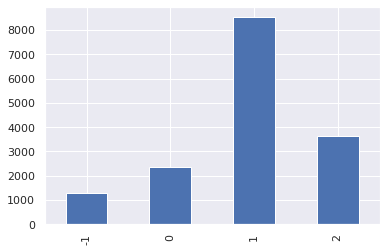

In [54]:
df_train['sentiment'].value_counts().sort_index().plot(kind = 'bar')
plt.show()

For the dataset we will be doing the following steps:
* removing the web-urls
* making everything lower case
* removing punctuation

For the dataset we will be doing the following steps:
* removing the web-urls
* making everything lower case
* removing punctuation

In [55]:
df_train.head(10)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


Make all text lower case

In [56]:
df_train['message'] = df_train['message'].str.lower()

In [57]:
puncts = list(string.punctuation)
puncts.append('…')
print(puncts)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '…']


In [58]:
def remove_punctuation(tweet):
    return ''.join([l for l in tweet if l not in puncts]) 

In [59]:
df_train['message'] = df_train['message'].apply(remove_punctuation)
df_train['message'].iloc[3]

'todayinmaker wired  2016 was a pivotal year in the war on climate change httpstco44wotxtlcd'

In [60]:
df_train['message'].iloc[9]

'rt paigetweedy no offense but like how do you just not believe in global warming'

Tokenization

### Tokenization

In [61]:
tokeniser = TreebankWordTokenizer()
df_train['tokens'] = df_train['message'].apply(tokeniser.tokenize)

In [62]:
df_train['tokens'].iloc[9]

['rt',
 'paigetweedy',
 'no',
 'offense',
 'but',
 'like',
 'how',
 'do',
 'you',
 'just',
 'not',
 'believe',
 'in',
 'global',
 'warming']

#### Stemming

In [63]:
stemmer = SnowballStemmer('english')

In [64]:
def dset_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [65]:
df_train['stem'] = df_train['tokens'].apply(dset_stemmer, args=(stemmer, ))

In [66]:
for i, t in enumerate(df_train.iloc[9]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, df_train.iloc[9]['stem'][i]))

rt                   --> rt        
paigetweedy          --> paigetweedi
no                   --> no        
offense              --> offens    
but                  --> but       
like                 --> like      
how                  --> how       
do                   --> do        
you                  --> you       
just                 --> just      
not                  --> not       
believe              --> believ    
in                   --> in        
global               --> global    
warming              --> warm      


### Lemmatization


In [67]:
lemmatizer = WordNetLemmatizer()

In [68]:
print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("ran",'v'))

cat
cactus
goose
rock
python
good
best
run
run


In [69]:
def dset_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]    

In [70]:
df_train['lemma'] = df_train['tokens'].apply(dset_lemma, args=(lemmatizer, ))

In [71]:
for i, t in enumerate(df_train.iloc[4]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, df_train.iloc[4]['lemma'][i]))

rt                   --> rt        
soynoviodetodas      --> soynoviodetodas
its                  --> it        
2016                 --> 2016      
and                  --> and       
a                    --> a         
racist               --> racist    
sexist               --> sexist    
climate              --> climate   
change               --> change    
denying              --> denying   
bigot                --> bigot     
is                   --> is        
leading              --> leading   
in                   --> in        
the                  --> the       
polls                --> poll      
electionnight        --> electionnight


### Stop Words

In [72]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [73]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

## Text feature extraction

### Bag of words

In [74]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict